In [1]:
import matplotlib.pyplot as plt
from matplotlib import transforms
from matplotlib import rc
from IPython.display import Image
import numpy as np
from astropy.io import fits as pyfits
from astropy.io import fits
from scipy.ndimage import gaussian_filter
import scipy
from scipy.optimize import minimize, rosen, rosen_der
from scipy.special import factorial
import scipy.integrate as integrate
from scipy.integrate import quad
from itertools import starmap
from scipy import optimize
import corner
import time
from mpl_toolkits import mplot3d
import healpy as hp
from scipy import nan
import dark_matter_jfactors as dmj
import math
import random


In [2]:
filelist = ['Bremss_00320087_E_50-814008_MeV_healpix_128.fits', 'Bremss_SL_Z6_R20_T100000_C5_E_50-814008_MeV_healpix_128.fits', 'pi0_Model_A_E_50-814008_MeV_healpix_128.fits', 'pi0_Model_F_E_50-814008_MeV_healpix_128.fits', 'ICS_Model_A_E_50-814008_MeV_healpix_128.fits', 'ICS_Model_F_E_50-814008_MeV_healpix_128.fits']
evermore_shifted = np.asarray([
    [33, 21, 49],
    [154, 112, 82],
    [241, 149, 91],
    [142, 52, 38],
    [33, 21, 49],
])/256

In [3]:
def readfile(filename):
    """
    A simple function to read the maps of a given number n and given filename.
    """
    file_to_read = fits.open(filename)
    return file_to_read

def reshape_file(hdu, n, inner20 = True):
    """
    Reshapes the data to be in the size we want
    """
    
    if inner20:
        numpix = np.linspace(0, hdu[0].header['NPIX']-1, num = hdu[0].header['NPIX'])
        NSIDE = int(hdu[0].header['NSIDE'])
        degrees = hp.pix2ang(NSIDE, np.array(numpix,dtype=np.int), lonlat = True)
        inner_20_pos = np.where(np.sqrt((degrees[0])**2+degrees[1]**2)<= 20)
        inner_20_neg = np.where(np.sqrt((degrees[0]-360)**2+degrees[1]**2)<= 20)
        testbin = list(hdu[n].data[inner_20_pos])+list(hdu[n].data[inner_20_neg])
        
        #might need this for plotting, not sure
        #data4 = hdu[n].data
        #test20 = np.copy(data4)
        #test20[inner_20] = np.nan
        #testbin = np.reshape(test20, (128*3, 1536//3))

    else:
        """
        testbin = np.reshape(hdu[n].data, (128*3, 1536//3))
        
        """
        numpix = np.linspace(0, hdu[0].header['NPIX']-1, num = hdu[0].header['NPIX'])
        NSIDE = int(hdu[0].header['NSIDE'])
        degrees = hp.pix2ang(NSIDE, np.array(numpix,dtype=np.int), lonlat = True)
        
        inner_20_pos = (np.sqrt((degrees[0])**2+degrees[1]**2)> 20)

        inner_20_neg = (np.sqrt((degrees[0]-360)**2+degrees[1]**2)> 20)
        inner_20 = np.logical_and(inner_20_pos, inner_20_neg)
        print(inner_20_pos)
        print(inner_20_neg)
        
        data4 = hdu[n].data
        test20 = np.copy(data4)
        test20[inner_20] = np.nan
        testbin = np.reshape(test20, (128*3, 1536//3))
        
        
    return testbin

def get_energy_index(E_desired, hdu):
    energy_hdu = np.concatenate(hdu[38].data, axis = 0)
    idx = find_nearest(energy_hdu, E_desired)
    return idx
    
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
    

In [4]:
def subtract(n):
    ##Template for 1 GeV and 10 GeV
    icsa = readfile(filelist[n])
    
    idx1 = get_energy_index(1*1e3, icsa)
    idx10 = get_energy_index(10*1e3, icsa)
    
    array1 = reshape_file(icsa, idx1, inner20 = False)
    array10 = reshape_file(icsa, idx10, inner20 = False)
    
    ##Sum up idx1 and idx 10, make them equal in sum
    sum1 = np.nansum(array1)
    sum10 = np.nansum(array10)
    array10_adjusted = (array10*sum1/sum10)
    subtract110 = np.abs(array1-array10_adjusted)/array1
    fig, ax = plt.subplots(figsize=(10, 10))
    image = ax.imshow(subtract110)
    fig.colorbar(image, ax=ax, anchor=(0, 0.3), shrink=0.7)
    plt.title(str(filelist[n]))
    
    return

In [5]:
hdu = readfile(filelist[4])
filetrue = reshape_file(hdu, 0, inner20 = True)
filefalse = reshape_file(hdu, 0, inner20 = False)
print(np.nansum(filetrue))
print(np.nansum(filefalse))

[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
0.02217642757535564
0.02217642757535564


/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()
/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review 

In [6]:
print(np.shape(subtract110))

NameError: name 'subtract110' is not defined

[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]


/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Text(0.5, 1.0, 'Bremss_00320087_E_50-814008_MeV_healpix_128.fits')

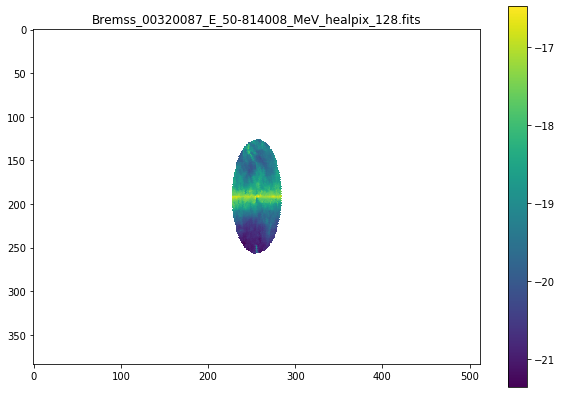

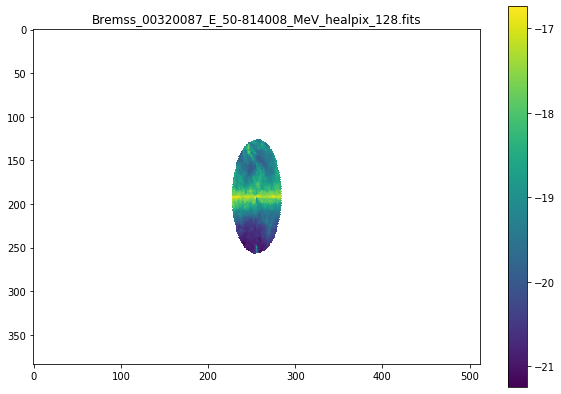

In [7]:
icsa = readfile(filelist[0])
idx1 = get_energy_index(1*1e3, icsa)
idx10 = get_energy_index(10*1e3, icsa)
array1 = reshape_file(icsa, idx1, inner20 = False)
array10 = reshape_file(icsa, idx10, inner20 = False)

sum1 = np.nansum(array1)
sum10 = np.nansum(array10)
array10_adjusted = array10*sum1/sum10
subtract110 = (array1)
fig, ax = plt.subplots(figsize=(10, 10))
image = ax.imshow(np.log(subtract110))
fig.colorbar(image, ax=ax, anchor=(0, 0.3), shrink=0.7)
plt.title(str(filelist[0]))

fig, ax = plt.subplots(figsize=(10, 10))
image = ax.imshow(np.log(array10_adjusted))
fig.colorbar(image, ax=ax, anchor=(0, 0.3), shrink=0.7)
plt.title(str(filelist[0]))



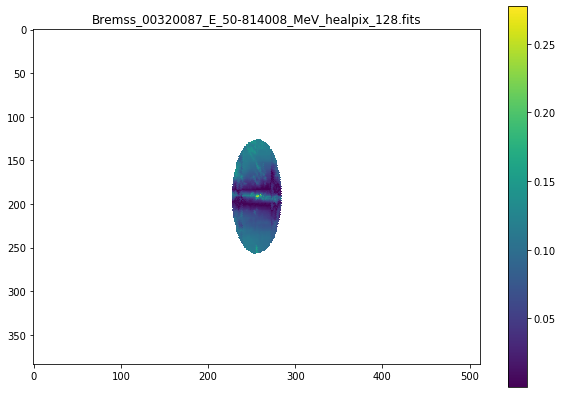

In [8]:
#for i in range(0, len(filelist)):
subtract(0)

PSF Smearing on Images

In [9]:
#n = 4 for ICSA, n = 2 for pi0
def psf_smoothing(n, energyidx, inner20psf = True):
    icsa = readfile(filelist[n])

    #inner20psf = False
    
    data50 = reshape_file(icsa, energyidx, inner20 = inner20psf) #get the data at 50 MeV
    initsum = np.nansum(data50)
        
    data50_convolved = gaussian_filter(data50, sigma=1) 
    finsum = np.nansum(data50_convolved)
    
    return data50_convolved*initsum/finsum

def psf_smoothing_DM():
    data50 = dmj.get_dNdE()[1]
    initsum = np.nansum(data50)
    data50_convolved = gaussian_filter(data50, sigma=1) 
    finsum = np.nansum(data50_convolved)
    
    return data50_convolved*initsum/finsum
    
    

(5910,)


/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


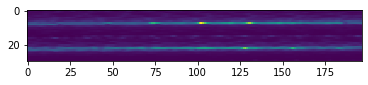

In [29]:
test_gaussian = psf_smoothing(2, 0, inner20psf = True)
print(np.shape(test_gaussian))
fin = np.reshape(test_gaussian, (30, 197))
plt.imshow(fin)

(384, 512)


/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Text(0.5, 1.0, 'ICS_Model_A_E_50-814008_MeV_healpix_128.fits')

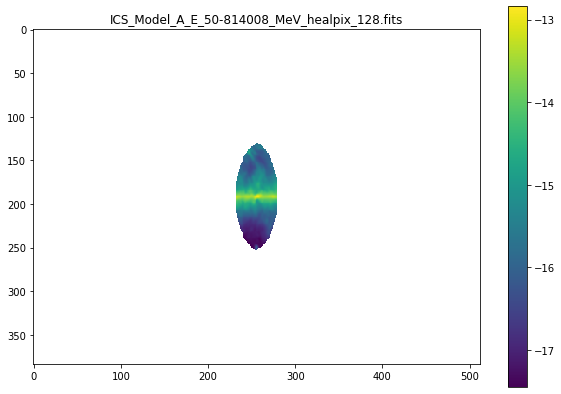

In [28]:

icsaconvolved = psf_smoothing(2, 0, inner20psf = False)
print(np.shape(icsaconvolved))
fig, ax = plt.subplots(figsize=(10, 10))
image = ax.imshow(np.log(icsaconvolved))
fig.colorbar(image, ax=ax, anchor=(0, 0.3), shrink=0.7)
plt.title(str(filelist[4]))

In [12]:
get_deltaE(0)

NameError: name 'get_deltaE' is not defined

In [25]:
def poisson_dist(n, energyidx, dm = False):
    if dm:
        convolved_data = psf_smoothing_DM()
    else:
        convolved_data = psf_smoothing(n, energyidx) #data in units of photons cm^-2 MeV^-1 str^-1
    deltaomega = 4*np.pi/196608 #divide by num of pixels
    deltaE = get_deltaE(energyidx)
    n_gamma = convolved_data*deltaE*31536000*1e4*deltaomega #seconds*meters^2, units of photons per pixel
    
    return n_gamma

def get_deltaE(n):
    energybins = np.concatenate(readfile(filelist[0])[38].data, axis = 0)
    bins_in_lin = np.log10(energybins)[n]
    spacing = 0.05691431
    
    high_bin = 10**(bins_in_lin + spacing)
    low_bin = 10**(bins_in_lin - spacing)
    
    
    deltaE = np.abs(high_bin - low_bin)
    #print('delta E: {}'.format(deltaE))
    
    return deltaE

def get_image(data):
    fig, ax = plt.subplots(figsize=(10, 10))
    image = ax.imshow(data)
    fig.colorbar(image, ax=ax, anchor=(0, 0.3), shrink=0.7)
    return

def simulated_data(energyidx, templates):
    
    
    n_gammatot = 0
    for i in range(0, len(templates)):
        n_gammatot += templates[i]
    len_of_rand = len(n_gammatot)
    simdata = np.zeros(len_of_rand)
    randdata = np.random.rand(len_of_rand)
    
    for i in range(0, len_of_rand):
        if n_gammatot[i]<1:
            if n_gammatot[i] < randdata[i]:
                simdata[i] = 0
            else:
                simdata[i] = 1
        else:
            simdata[i] = np.random.poisson(lam = n_gammatot[i])
    #print('simdata just 20: ', np.nansum(simdata))
    
    return simdata

def minimize_likelihood(energyidx):
    pi = poisson_dist(2, energyidx)
    ics = poisson_dist(4, energyidx)   
    brem = poisson_dist(0, energyidx)
    darkm = poisson_dist(np.nan, energyidx, dm = True)

    k = simulated_data(energyidx, [pi, ics, brem])#remove DM for accurate
    #print(np.nanmean(lamb))
    #asdfasd
    
    #Need to minimize for lamb < 50 and lamb > 50
    
    bnds = ((0, np.inf), (0, np.inf), (0, np.inf), (1e-10, np.inf))
    result = minimize(likelihood, (1, 1, 1, 1), args = (k, pi, ics, brem, darkm), bounds = bnds)
    min_likelihood = result.x
    chi2 = result.fun
    #print(result)

    return min_likelihood


def likelihood(constants, k, pi, ics, brem, dm):
    """
    Gets the Total Likelihoods from the Gaussian Regime and the Poisson Regime
    Once each has been calculated, multiplies values together for final likelihood
    """
    
    likelihood_poiss = likelihood_poisson(constants, k, pi, ics, brem, dm)
    #print('likelihood: {}'.format(likelihood_poiss)) 
    return likelihood_poiss

def merge(list1, list2):
      
    merged_list = tuple(zip(list1, list2)) 
    return merged_list

def likelihood_gaussian(constants, lamb, pi, ics):
    sigma = np.sqrt(constants[0]*pi+constants[1]*ics)
    mu = lamb
    rng = 0.5
    
    #flatten arrays
    sigma_flat = sigma.flatten()
    mu_flat = mu.flatten()
    length_flattened = len(mu_flat)
    #get arrays in sigma, mu tuple format
    ms_tuples = list(merge(mu_flat, sigma_flat))
    ms = np.array(ms_tuples, dtype = 'f,f')
    lower_bound_arr = mu_flat - rng
    upper_bound_arr = mu_flat + rng
    
    args = np.concatenate((np.full((length_flattened, 1), prob_func), lower_bound_arr.reshape((length_flattened, 1)), upper_bound_arr.reshape((length_flattened, 1)), ms.reshape((length_flattened, 1))), axis = 1)
    
    #log likelihood
    prob = list(starmap(lambda a, b, c, d: quad(a, b, c, d)[0], args))

    #reshape for testing
    l = np.sum(np.log(prob))
    likely = -2*l
    
    return likely
    
def prob_func(x, mu, sigma):
    probdens = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-1/2*((x-sigma**2)/sigma)**2)
    return probdens
    
def likelihood_poisson(constants, k, pi, ics, brem, dm):
    #print('constants: ', constants)
    lamb = constants[0]*pi+constants[1]*ics+constants[2]*brem+constants[3]*dm
    #print('k: ', k)
    
    
    #print(loglamb)
    
    fprob = -scipy.special.gammaln(k+1)+k*np.log(lamb)-lamb #log likelihood of poisson
    return -2*np.nansum(fprob)
    
    

In [30]:
def spectrum(which_spectrum = 0):
    #0 is pi
    #1 is ics
    #2 is brem
    #3 is dm
    pi = []
    ics = []
    brem = []
    dm = []
    energies = readfile(filelist[0])[38].data
    for i in range(0, len(energies)):
        print(i)
        constants = minimize_likelihood(i)
        pi.append(constants[0])
        ics.append(constants[1])
        brem.append(constants[2])
        dm.append(constants[3])
        
    return np.array(energies, dtype = np.double), [pi, ics, brem, dm]

In [31]:

start = time.time()
print(minimize_likelihood(15))
end = time.time()
print(end - start)

[9.99434857e-01 1.00030554e+00 1.00176975e+00 4.10270612e-06]
2.636181116104126


In [232]:
start = time.time()
e, dnde = spectrum(which_spectrum = 0)
end = time.time()
print(end - start)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:135: RuntimeWarning: divide by zero encountered in log


25
26
27
28
29
30
31
32
33
34
35
36
37
75.06827306747437


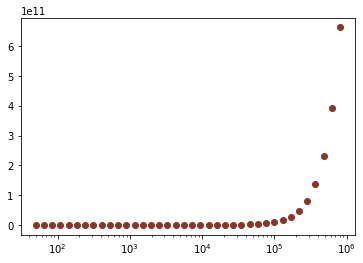

In [235]:
plt.scatter(en, en**2*dnde[3], color = evermore_shifted[3])
#plt.yscale('log')
plt.xscale('log')

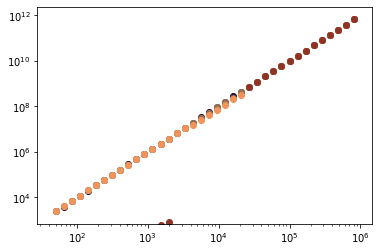

In [233]:
for x in range(0, len(dnde)):
    plt.scatter(en, en**2*dnde[x], color = evermore_shifted[x])
    plt.yscale('log')
    plt.xscale('log')

In [29]:
minimize_likelihood(0)

[5.95069249e+22 5.94444829e+22 5.92579599e+22 ... 5.89497374e+22
 5.92579599e+22 5.94444829e+22]
55.994646943553846
994.0287553461436
447.99320148042403
1.5611786246176073e-08
1498.5998307952623
      fun: 58246.65888785888
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 7.25704012, -1.58252078, -0.82800398,  0.        ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 45
      nit: 5
   status: 0
  success: True
        x: array([1.00025858, 0.99903606, 1.00122099, 1.        ])


array([1.00025858, 0.99903606, 1.00122099, 1.        ])

In [23]:
pi = poisson_dist(2, 0)
ics = poisson_dist(4, 0)
brem = poisson_dist(0, 0)
dm = dmj.get_dNdE()[1]
lamb = simulated_data(0, [pi, ics, brem])
likeli = likelihood_poisson([1, 1, 1, 1], lamb, pi, ics, brem, dm)
print(likeli)

[5.95069249e+22 5.94444829e+22 5.92579599e+22 ... 5.89497374e+22
 5.92579599e+22 5.94444829e+22]
1094818.5629043858


In [277]:
start = time.time()
pi = poisson_dist(2, 0)
ics = poisson_dist(4, 0)
brem = poisson_dist(0, 0)

simdat = simulated_data(0, [pi, ics, brem])
end = time.time()
print(end - start)

simdata just 20:  8854848
0.15479588508605957


In [306]:
print('hello')

hello


In [305]:
a0 = []
a1 = []
a2 = []
a3 = []

for q in range(0, 100):
    minlike = minimize_likelihood(0)
    a0.append(minlike[0])
    a1.append(minlike[1])
    a2.append(minlike[2])
    a3.append(minlike[3])

/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in log


[0.9997697187870291, 0.9997351727644137, 1.0001361000662474, 1.0003612024784985, 1.0000213136454192, 1.000069130692949, 0.9997752260275581, 0.999954647305182, 1.0001720713978772, 0.9999706729054075, 1.000008128944556, 0.9997724971959931, 1.0000006078026233, 0.9998821808084226, 1.0002748123102654, 0.9999699133947316, 0.9998762149342086, 1.0000294750159084, 1.0002765707454133, 0.999848854574247, 0.9997697132421232, 0.9998692145382323, 1.000210414835193, 0.9998941171943277, 1.000059306071765, 1.0000362758172603, 0.9997874198765492, 0.9998671540137194, 0.999987194919379, 1.000072619208563, 0.9999693695528039, 0.9996471299177576, 1.000138375374741, 0.999853853945005, 1.0000387971903992, 1.0000225674577383, 0.9996726508823635, 0.9997096769830714, 0.9996637244177876, 0.9999987203112647, 1.0002529486861644, 1.000121213791881, 0.9999614535182203, 0.9999241229836348, 0.9997495104660973, 1.0002466607498237, 0.9998059641695844, 0.999514241752958, 1.00022474991579, 1.0002430572023184, 1.00044962491

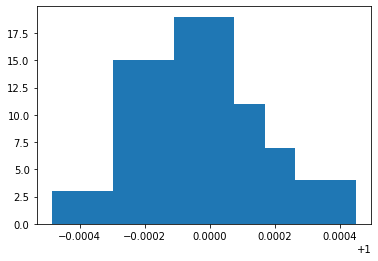

In [321]:
plt.hist(list(a1))
print(a1)

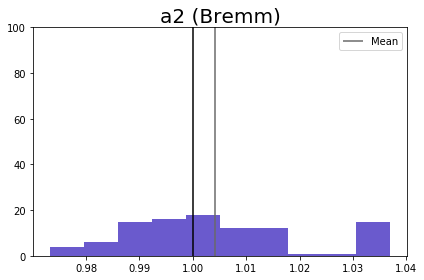

In [309]:
plt.hist(a2, color = 'slateblue', bins = 10)
plt.title(r'a2 (Bremm)', fontsize=20)
plt.vlines(1, 0, 1e5, color = 'black')
plt.vlines(np.nanmean(a2), 0, 1e5, color = 'dimgrey', label = 'Mean')
plt.ylim(0, 100)
plt.tight_layout()
#plt.xlim(.99, 1.01)
plt.legend()

0.9654835633673295
0.9999677879223471
1.004240889001603


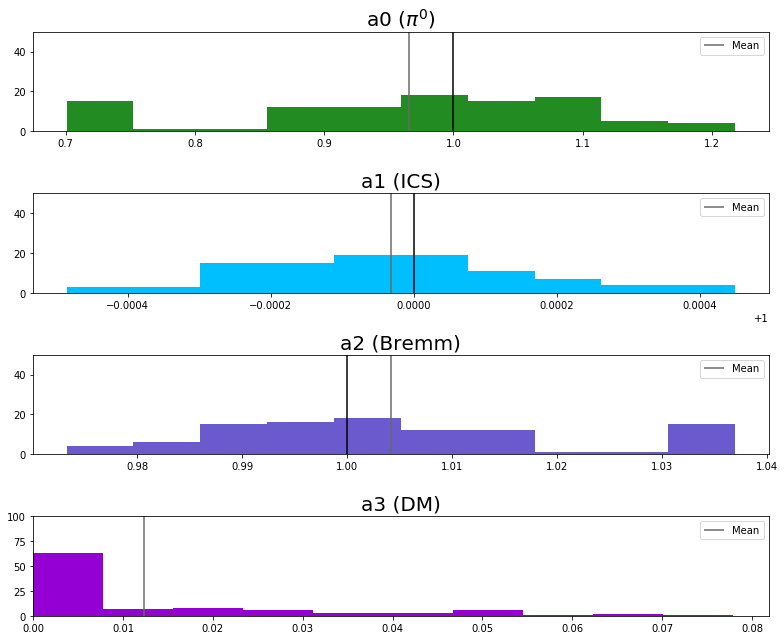

In [318]:
print(np.nanmean(a0))
print(np.nanmean(a1))
print(np.nanmean(a2))
numbins = 10
ylimall = 50
fig = plt.figure(figsize = (11, 9))
plt.subplot(411)
plt.hist(a0, color = 'forestgreen', bins = numbins)
plt.title(r'a0 ($\pi^{0}$)', fontsize=20)
plt.vlines(1, 0, 1e5, color = 'black')
plt.vlines(np.nanmean(a0), 0, 1e5, color = 'dimgrey', label = 'Mean')
plt.ylim(0, ylimall)
plt.legend()
plt.subplot(412)
plt.hist(np.asarray(a1), color = 'deepskyblue', bins = numbins)
plt.title('a1 (ICS)', fontsize=20)
plt.vlines(1, 0, 1e5, color = 'black')
plt.vlines(np.nanmean(a1), 0, 1e5, color = 'dimgrey', label = 'Mean')
plt.ylim(0, ylimall)
plt.legend()
plt.subplot(413)
plt.hist(a2, color = 'slateblue', bins = numbins)
plt.title(r'a2 (Bremm)', fontsize=20)
plt.vlines(1, 0, 1e5, color = 'black')
plt.vlines(np.nanmean(a2), 0, 1e5, color = 'dimgrey', label = 'Mean')
plt.ylim(0, ylimall)
plt.tight_layout()
plt.legend()
plt.subplot(414)
plt.hist(a3, color = 'darkviolet', bins = numbins)
plt.title(r'a3 (DM)', fontsize=20)
plt.vlines(1, 0, 1e5, color = 'black')
plt.vlines(np.nanmean(a3), 0, 1e5, color = 'dimgrey', label = 'Mean')
plt.ylim(0, 100)
plt.xlim(0, np.nanmax(a3)*1.05)
plt.tight_layout()
plt.legend()

In [86]:
def get_contours(idx):
    pi = poisson_dist(2, idx)
    ics = poisson_dist(4, idx)
    brem = poisson_dist(0, idx)
    lamb = simulated_data(idx, [pi, ics, brem])

    
    #a2test = np.linspace(1, 1.01, num = 40) #bremm
    #a1test = np.linspace(.993, .996, num = 40)
    #a0test = np.linspace(1.01, 1.045, num = 40) #should be pi
    
    a2test = np.linspace(.5, 1.5, num = 20) #bremm
    a1test = np.linspace(.5, 1.5, num = 20)
    a0test = np.linspace(.5, 1.5, num = 20) #should be pi
    
    
    #a0test = np.linspace(.9, 1.1, num = 80) #should be pi
    
    #a1test = np.linspace(0.9985, 1.0015, num = 100) #should be ics
    #a0test = np.linspace(0.980, 1.020, num = 100) #should be pi
    
    contour_total = np.zeros((len(a2test), len(a1test), len(a0test)))
    
    for k, a2 in enumerate(a2test):
        for i, a1 in enumerate(a1test):
            for j, a0 in enumerate(a0test):
                contour_total[k][i][j] = likelihood([a0, a1, a2], lamb, pi, ics, brem)
        
    return a0test, a1test, a2test, contour_total
            

In [87]:
def make_triangl(idx):
    a0, a1, total = get_contours(idx)
    print('done with contours')
    
    num_templates = 2
    
    #sum over the different axes:
    template_arrays = [a0, a1]
    sum_arrays = []
    len_total_arrays = len(a0)*len(a1)
    
    for ax in range(0, num_templates):
        sum_arrays.append(np.sum(total, axis = ax))
        
    get_plot(samp, arrays, templates)
        
    return total, sum_arrays, [a0, a1]

def get_plot(samp, arrays, templates):
    fig = plt.figure(figsize = (11, 9))
    plt.subplot(2, 2, 1)
    plt.scatter(templates[0], arrays[0], color = 'pink')
    plt.xlim(np.nanmin(templates[0]), np.nanmax(templates[0]))
    plt.subplot(2, 2, 4)
    plt.scatter(arrays[1], templates[1], color = 'purple')
    plt.ylim(np.nanmin(templates[1]), np.nanmax(templates[1]))
    plt.subplot(2, 2, 3)
    h = plt.contourf(templates[0], templates[1], samp, 50, cmap = 'rainbow')

    testvals = np.where(samp == np.nanmin(samp))
    plt.scatter(templates[0][testvals[1]], templates[1][testvals[0]], marker = 'x', color = 'yellow', s = 200)
    cs = plt.contour(templates[0], templates[1], samp, [np.nanmin(samp)+2.3, np.nanmin(samp)+6.18], colors = ['pink', 'purple', 'yellow'])
    fmt = {}
    strs = [r'1$\sigma$', r'2$\sigma$', r'3$\sigma$']
    for l, s in zip(cs.levels, strs):
        fmt[l] = s
    plt.clabel(cs, inline=True, fontsize=10, fmt=fmt, colors = ['pink', 'purple', 'yellow'])
    plt.xlabel(r'$a_0$ ($\pi^{0}$)', fontsize=20)
    plt.ylabel(r'$a_1$ (ICS)', fontsize=20)
    plt.xlim(np.nanmin(templates[0]), np.nanmax(templates[0]))
    plt.ylim(np.nanmin(templates[1]), np.nanmax(templates[1]))
    return
        
    
        

In [88]:
start = time.time()
a0, a1, a2, contours = get_contours(0)
end = time.time()
print(end - start)

5910
1.7027521133422852


In [92]:
minlike = minimize_likelihood(0)

      fun: 47205.40634914818
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00218279, -0.76761353, -0.06330083])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 88
      nit: 18
   status: 0
  success: True
        x: array([1.18721299, 0.98224015, 0.9153285 ])


In [93]:
print(contours.flatten())
print(np.nanmin(contours))

[464343.78098734 447019.75481579 430188.43341759 ... 332653.83117923
 342846.34708719 353208.01303263]
47253.893780841034


In [ ]:
#make a triangle plot because why the fuck nottt

In [94]:
a0test, a1test, a2test = np.meshgrid(a0, a1, a2)
a0flat = (a0test).flatten()
a1flat = (a1test).flatten()
a2flat = (a2test).flatten()
where_one_sigma = np.where(contours.flatten()<=np.nanmin(contours)+2.3)
where_two_sigma = np.where(contours.flatten()<=np.nanmin(contours)+6.18)
where_three_sigma = np.where(contours.flatten()<=np.nanmin(contours)+11.83)
where_min = np.where(contours.flatten()<=np.nanmin(contours))
min_likely = [float(a0flat[where_min]), float(a1flat[where_min]), float(a2flat[where_min])]

In [96]:
print(len(where_one_sigma[0]))
print(np.where(contours.flatten()<=np.nanmin(contours)))
print(a0flat[2])
print(a1flat[2])
print(a2flat[2])

2
(array([2995]),)
0.5
0.5
0.6052631578947368


In [97]:
print(min_likely)

[0.9736842105263157, 0.868421052631579, 1.2894736842105263]


Text(0.5, 0.92, '1$\\sigma$')

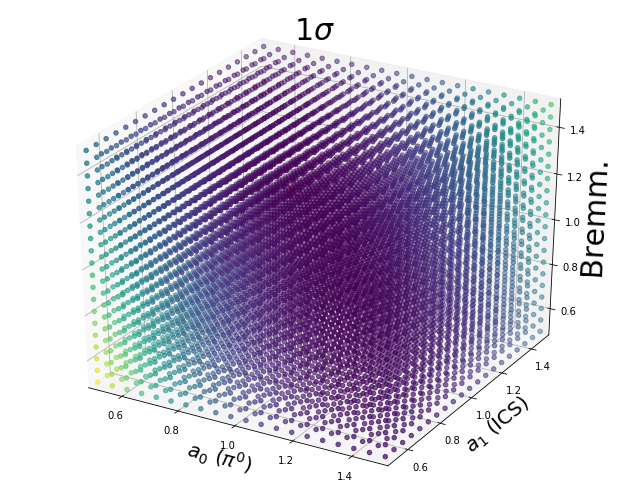

In [99]:
fig = plt.figure(figsize = (11, 9))
ax = plt.axes(projection='3d')
#ax.scatter(a0flat[where_three_sigma], a1flat[where_three_sigma], a2flat[where_three_sigma], c = contours.flatten()[where_three_sigma])
ax.scatter(a0flat, a1flat, a2flat, c = contours.flatten())

ax.scatter(min_likely[0], min_likely[1], min_likely[2], c = 'red', marker = 'x', s = 200)
plt.xlim(np.nanmin(a0flat), np.nanmax(a0flat))
plt.ylim(np.nanmin(a1flat), np.nanmax(a1flat))
ax.set_zlim(np.nanmin(a2flat), np.nanmax(a2flat))
plt.xlabel(r'$a_0$ ($\pi^{0}$)', fontsize=20)
plt.ylabel(r'$a_1$ (ICS)', fontsize=20)
ax.set_zlabel('Bremm.', fontsize=30, rotation = 0)
plt.title(r'1$\sigma$', fontsize = 30)

done with contours
59.079824924468994


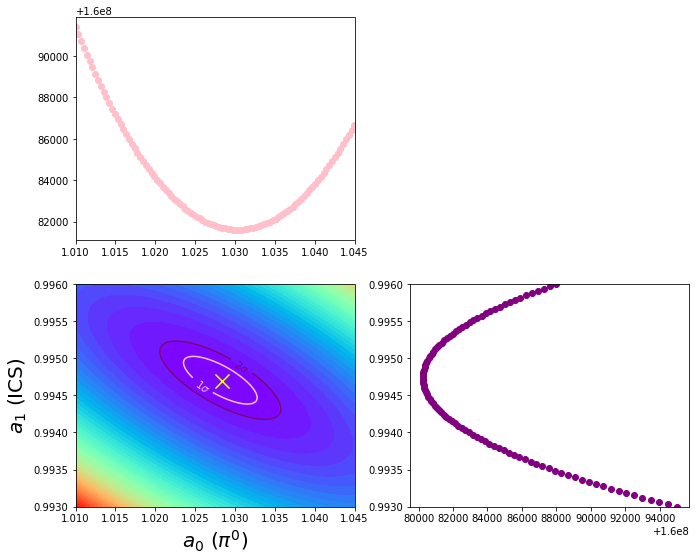

In [69]:

start = time.time()
samp, arrays, templates = make_triangl(0)
end = time.time()
print(end - start)



In [54]:
print(arrays)

[array([80073812.5568693 , 80073447.45206685, 80073101.35437377,
       80072774.26167352, 80072466.17185019, 80072177.08278853,
       80071906.99237372, 80071655.89849162, 80071423.79902864,
       80071210.69187176, 80071016.57490863, 80070841.44602735,
       80070685.30311672, 80070548.14406608, 80070429.9667653 ,
       80070330.76910488, 80070250.54897588, 80070189.30427004,
       80070147.03287949, 80070123.7326971 , 80070119.40161629,
       80070134.03753096, 80070167.6383357 , 80070220.2019257 ,
       80070291.72619663, 80070382.20904471, 80070491.64836693,
       80070620.04206066, 80070767.38802394, 80070933.68415537,
       80071118.92835416, 80071323.11852   , 80071546.2525533 ,
       80071788.32835494, 80072049.34382635, 80072329.29686962,
       80072628.18538746, 80072946.00728297, 80073282.76045997,
       80073638.44282289]), array([64061206.73891928, 64060805.65576658, 64060419.19019109,
       64060047.34133705, 64059690.10834879, 64059347.49037074,
       6405

(0.993, 0.996)

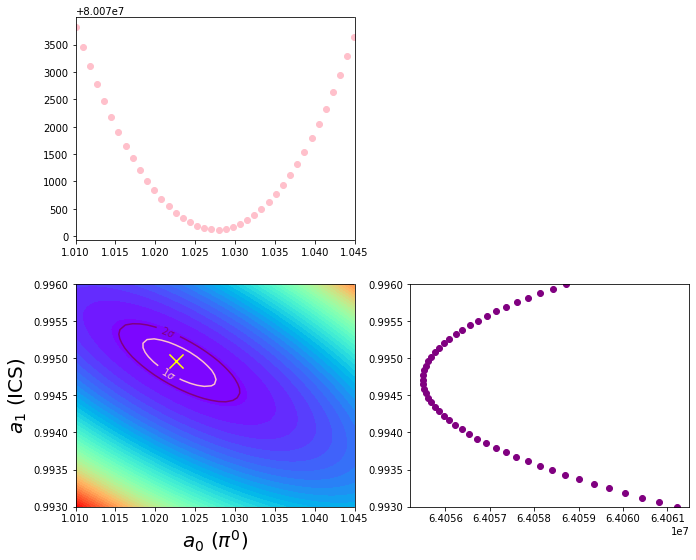

In [28]:
import corner
import numpy as np
import matplotlib.pyplot as plt

ndim, nsamples = 2, 10000
np.random.seed(42)
samples = np.random.randn(ndim * nsamples).reshape([nsamples, ndim])
print(samples.shape)

(10000, 2)


In [32]:
samp = make_triangl(0)

done with contours
(2,)


array([array([[1601387.02609484, 1601373.00040151, 1601359.35535163, ...,
        1601121.25501027, 1601121.2849518 , 1601121.69397435],
       [1601371.43780691, 1601357.68720977, 1601344.31723559, ...,
        1601115.83166578, 1601116.1359481 , 1601116.81929111],
       [1601356.21526039, 1601342.73974392, 1601329.64482993, ...,
        1601110.77349015, 1601111.35209783, 1601112.30974588],
       ...,
       [1601049.39601341, 1601048.28309862, 1601047.5498664 , ...,
        1601260.75938852, 1601273.66669299, 1601286.95212519],
       [1601050.97444838, 1601050.13590251, 1601049.67701882, ...,
        1601272.47592674, 1601285.65684855, 1601299.21587786],
       [1601052.91762033, 1601052.35342795, 1601052.16887735, ...,
        1601284.55663243, 1601298.01115623, 1601311.8437673 ]]),
       2], dtype=object)

In [18]:

lamb = simulated_data(0)
pi = poisson_dist(2, 0)
ics = poisson_dist(4, 0)
print(a1[20])
print(a0[40])
print(likelihood([a1[20], a0[40]], lamb, pi, ics))
print(contour_total[20][40])


NameError: name 'a1' is not defined

In [19]:

a0, a1, contour_total = get_contours(0)

KeyboardInterrupt: 

Text(0, 0.5, '$a_1$ (ICS)')

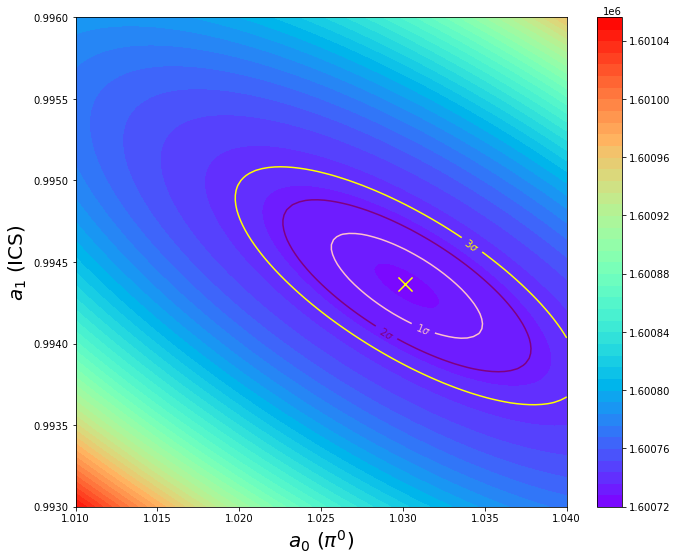

In [760]:
fig, ax = plt.subplots(figsize = (11, 9))



h = plt.contourf(a0, a1, contour_total, 50, cmap = 'rainbow')
testvals = np.where(contour_total == np.nanmin(contour_total))
fig.colorbar(h)
plt.scatter(a0[testvals[1]], a1[testvals[0]], marker = 'x', color = 'yellow', s = 200)
cs = plt.contour(a0, a1, contour_total, [np.nanmin(contour_total)+2.3, np.nanmin(contour_total)+6.18, np.nanmin(contour_total)+11.83], colors = ['pink', 'purple', 'yellow'])
fmt = {}
strs = [r'1$\sigma$', r'2$\sigma$', r'3$\sigma$']
for l, s in zip(cs.levels, strs):
    fmt[l] = s

plt.clabel(cs, inline=True, fontsize=10, fmt=fmt, colors = ['pink', 'purple', 'yellow'])
plt.xlabel(r'$a_0$ ($\pi^{0}$)', fontsize=20)
plt.ylabel(r'$a_1$ (ICS)', fontsize=20)

In [723]:
print(np.where(contour_total == np.nanmin(contour_total)))
print(a0[43])
print(a1[29])

(array([29]), array([26]))
1.0438775510204081
0.9946835443037975


Text(0, 0.5, '$a_1$ (ICS)')

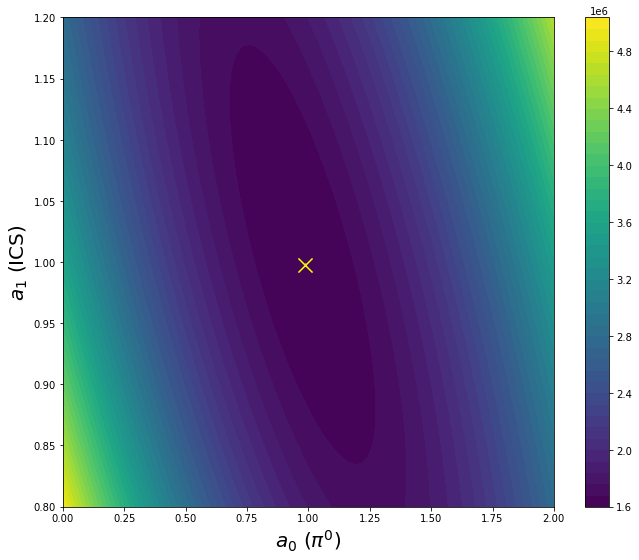

In [643]:
fig, ax = plt.subplots(figsize = (11, 9))
h = plt.contourf(a0, a1, contour_total, 50)
fig.colorbar(h)
plt.scatter(a0[39], a1[39], marker = 'x', color = 'yellow', s = 200)
cs = plt.contour(a0, a1, contour_total, [np.nanmin(contour_total)+2.3, np.nanmin(contour_total)+6.18, np.nanmin(contour_total)+11.83])
plt.clabel(cs, inline=True, fontsize=10)
plt.xlabel(r'$a_0$ ($\pi^{0}$)', fontsize=20)
plt.ylabel(r'$a_1$ (ICS)', fontsize=20)


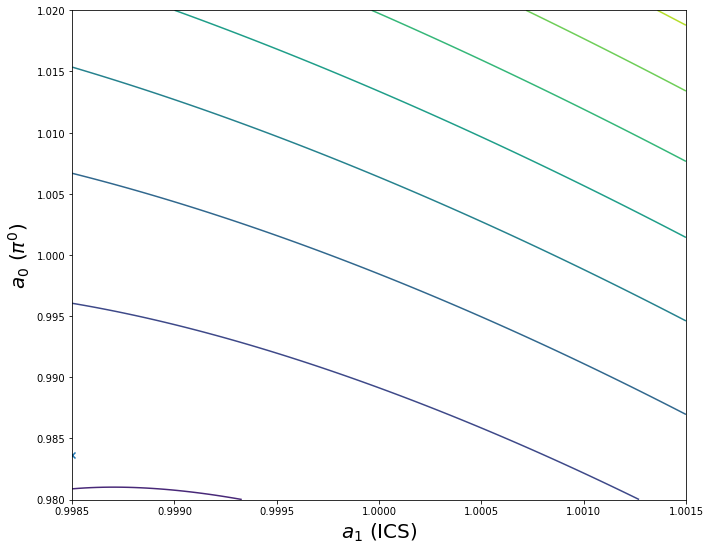

In [552]:
fig = plt.figure(figsize = (11, 9))
minpoint = np.where(contour_total == np.nanmin(contour_total))
maxpar = np.array([a1[minpoint[0]], a0[minpoint[1]]])
plt.contour(a1, a0, contour_total)
plt.ylabel(r'$a_0$ ($\pi^{0}$)', fontsize=20)
plt.xlabel(r'$a_1$ (ICS)', fontsize=20)
plt.xlim(np.nanmin(a1), np.nanmax(a1))
plt.ylim(np.nanmin(a0), np.nanmax(a0))
plt.scatter(maxpar[0], maxpar[1], marker = 'x')
#plt.show()
plt.savefig('contours_ics_pi.pdf')

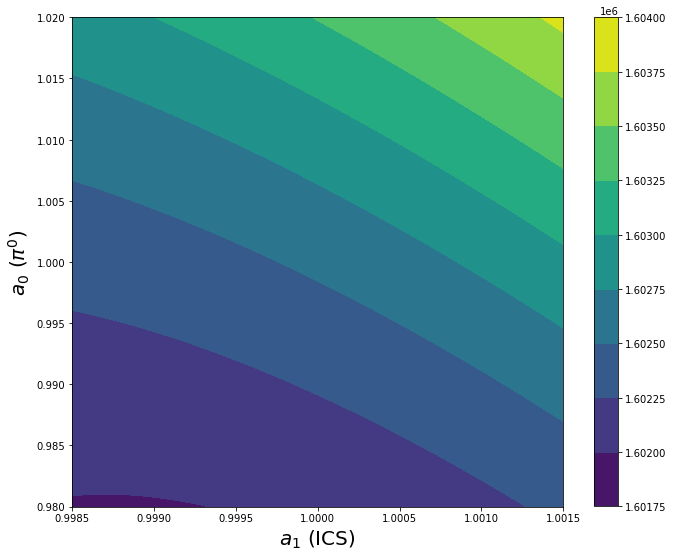

In [554]:
fig = plt.figure(figsize = (11, 9))
h = plt.contourf(a1, a0, contour_total)
cbar = fig.colorbar(h)
minpoint = np.where(contour_total == np.nanmin(contour_total))
maxpar = np.array([a1[minpoint[0]], a2[minpoint[1]]])
plt.scatter(a1[minpoint[0]], a2[minpoint[1]], marker = 'x', color = 'red')
plt.ylabel(r'$a_0$ ($\pi^{0}$)', fontsize=20)
plt.xlabel(r'$a_1$ (ICS)', fontsize=20)
plt.ylim(np.nanmin(a0), np.nanmax(a0))
plt.xlim(np.nanmin(a1), np.nanmax(a1))
plt.show()


In [555]:
print(maxpar)

[[0.9985    ]
 [0.86101695]]


In [474]:
print(minpoint)
print(a0[39])
print(a1[19])

(array([39]), array([19]))
1.1
0.9871794871794872


In [310]:
np.abs(13.142547540696327-13.14254714524877)

3.95447557366424e-07

In [220]:
two_sig_a0_up = np.abs(1-1.0007277856205194)
two_sig_a0_down = np.abs(1-0.965804422588597)
two_sig_a1_up = np.abs(1-1.0000155492945328)
two_sig_a1_down = np.abs(1-0.9971920901241567)

print(r'a0: = 1 + {} - {}'.format(two_sig_a0_up, two_sig_a0_down))
print(r'a1: = 1 + {} - {}'.format(two_sig_a1_up, two_sig_a1_down))

a0: = 1 + 0.00072778562051945 - 0.034195577411403
a1: = 1 + 1.5549294532846147e-05 - 0.0028079098758433396


In [313]:
lamb = simulated_data(0)
pi = poisson_dist(2, 0)
ics = poisson_dist(4, 0)

print(np.sum(ics))
print(np.sum(pi))
print(np.sum(lamb))

51070873.35625161
2728326.726332572
53792753


In [309]:
51070874.89292877/2728326.8084254973

18.718752729773417

In [262]:
avals_x = np.linspace(.999, 1.001, 80)
avals_y = np.linspace(.999, 1.001, 80)

lamb = simulated_data(energyidx)
pi = poisson_dist(2, energyidx)
ics = poisson_dist(4, energyidx)

total_arr = []

count = 0

for a0 in avals_x:
    temparr = []
    count +=1
    print(count)
    for a1 in avals_y:
        temparr.append(likelihood([a0, a1], lamb, pi, ics))
    total_arr.append(temparr)
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


KeyboardInterrupt: 

In [246]:
print(total_arr)
print(avals_x)
print(avals_y)

[[1928107.9583898215, 1825367.202014368, 1808019.2940040939, 1876064.2344292076, 2029502.0236390107, 2268332.6622618297, 2592556.1512049315, 3002172.4916543625, 3497181.6850748, 4077583.7332092966, 4743378.6380790705, 5494566.401983158, 6331147.0274981335, 7253120.517477675, 8260486.875052226, 9353246.103628451, 10531398.206888845, 11794943.188791167, 13143881.053567816, 14578211.805725284], [1923533.9750923347, 1823426.6433379224, 1808712.1599465236, 1879390.5249942853, 2035461.7388364456, 2276925.8021072685, 2603782.715719954, 3016032.4808664774, 3513675.099017445, 4096710.5719218305, 4765138.901606768, 5518960.090377204, 6358174.140815617, 7282781.055781579, 8292780.838411421, 9388173.492117688, 10568959.020588735, 11835137.427788174, 13186708.717954258, 14623672.895599313], [1919109.8337262147, 1821635.926592599, 1809554.8678200846, 1882866.6574907575, 2041571.2959657935, 2285668.783885391, 2615159.1221686844, 3030042.3120135805, 3530318.354896609, 4115987.2525726687, 4787049.00707

In [260]:
print(total_arr[1][1])
print(avals_x[1])
print(avals_y[1])

1823426.6433379224
0.9873684210526316
0.9873684210526316


(0.6, 1.4)

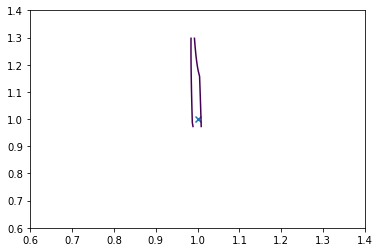

In [261]:
z = np.copy(total_arr)
zshape = z.reshape((len(avals_x), len(avals_y)))
plt.contour(avals_x, avals_y, total_arr, [1823426.6433379224])
plt.scatter(1, 1, marker = 'x')
plt.xlim(.6, 1.4)
plt.ylim(.6, 1.4)

In [142]:
probs = minimize_likelihood(0)

ValueError: f(a) and f(b) must have different signs

In [203]:
testvals = np.logspace(-1, 1, num = 15)
print(testvals)

[ 0.1         0.13894955  0.19306977  0.26826958  0.37275937  0.51794747
  0.71968567  1.          1.38949549  1.93069773  2.6826958   3.72759372
  5.17947468  7.19685673 10.        ]


In [150]:
likelihood([1, 1e3], lamb, pi, ics)

1607037.4461292638

In [312]:
energyidx = 0
counts = 0
lamb = simulated_data(energyidx)
pi = poisson_dist(2, energyidx)
ics = poisson_dist(4, energyidx)
testvals = np.logspace(-1, 1, num = 15)
like = []
#holding a0 constant
for testval in testvals:
    counts += 1
    print(counts)
    like.append(likelihood([1, testval], lamb, pi, ics))



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [207]:
print(like)

[inf, inf, inf, inf, inf, inf, 12823480.949495204, 1806596.8019156968, 23423141.027617462, inf, inf, inf, inf, inf, inf]


In [211]:
print(testvals[6])
print(like[6])
print('----')
print(testvals[7])
print(like[7])
print('----')
print(testvals[8])
print(like[8])

0.7196856730011519
12823480.949495204
----
1.0
1806596.8019156968
----
1.3894954943731375
23423141.027617462


(0.1, 10.0)

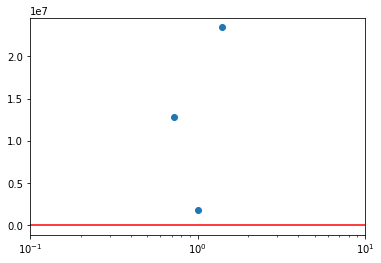

In [206]:
plt.scatter(testvals, np.asarray(like))
plt.xscale('log')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlim(1e-1, 1e1)

array([[260, 222, 232, ..., 259, 242, 262],
       [241, 227, 242, ..., 260, 224, 248],
       [252, 238, 245, ..., 224, 228, 258],
       ...,
       [234, 239, 227, ..., 220, 257, 211],
       [253, 203, 248, ..., 246, 261, 236],
       [250, 252, 263, ..., 217, 247, 245]])

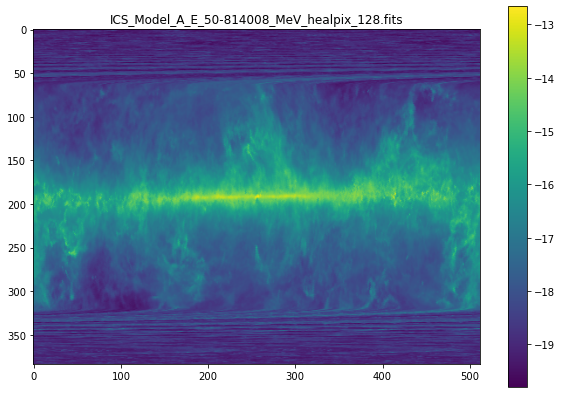

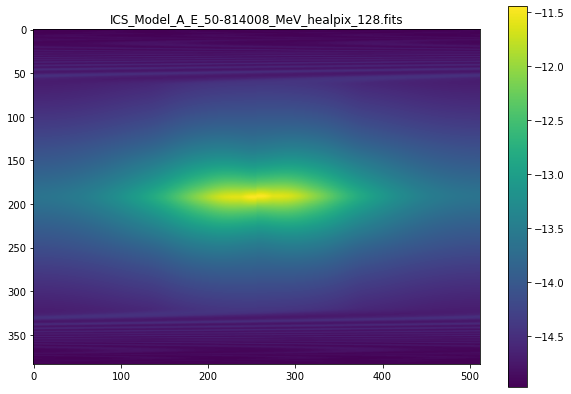

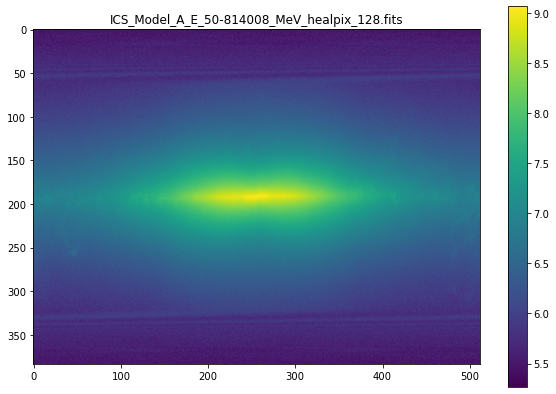

In [218]:
simulated_data(0)